In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Economist Pie Chart

In [51]:
pre_tax = pd.read_csv("data/bank-profits.csv")
# Unit is billion

,region,year-2007,year-2011
0,Asia Pacific,148.554,410.718
1,Middle East and Africa,33.012,49.530
2,Latin America,19.650,49.530
3,Central and Eastern Europe,14.148,25.908
4,Western Europe,363.132,48.006
5,North America,208.290,178.308


In [140]:
# Convert
pre_tax["year-2007"] = pre_tax["year-2007"].astype(float)
pre_tax["year-2011"] = pre_tax["year-2011"].astype(float)
# Add additional columns
pre_tax['perc-2007']= pre_tax['year-2007']/pre_tax['year-2007'].sum()*100
pre_tax['perc-2011']= pre_tax['year-2011']/pre_tax['year-2011'].sum()*100
pre_tax['perc-change'] = pre_tax['perc-2011'] - pre_tax["perc-2007"]

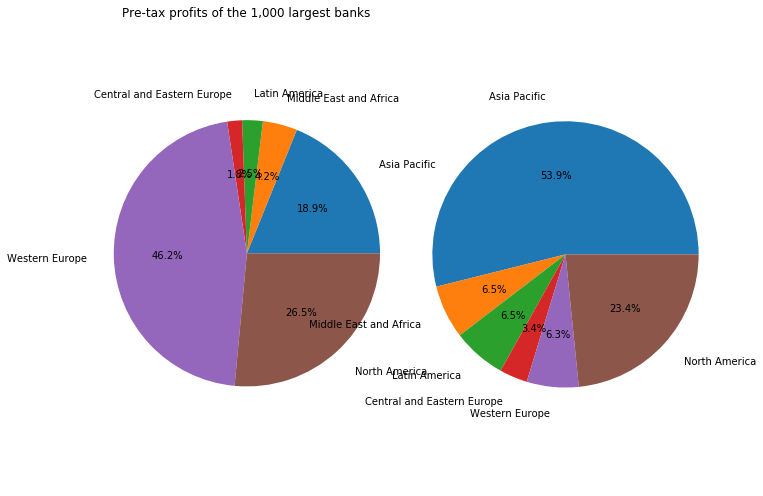

In [290]:
# Graph
labels=pre_tax["region"]
ax = pre_tax[['perc-2007','perc-2011']].plot(kind='pie', subplots=True, figsize=(9,7), labels=labels, labeldistance=1.2,autopct='%1.01f%%', legend=False) 
# Make it circular and without axis                                      
ax[0].axis('equal')                                             
ax[1].axis('equal')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
# Set title
ax[0].set_title("Pre-tax profits of the 1,000 largest banks")
# Save
plt.tight_layout()
plt.savefig("economist_pies.pdf", transparent=True)

# Arrow chart

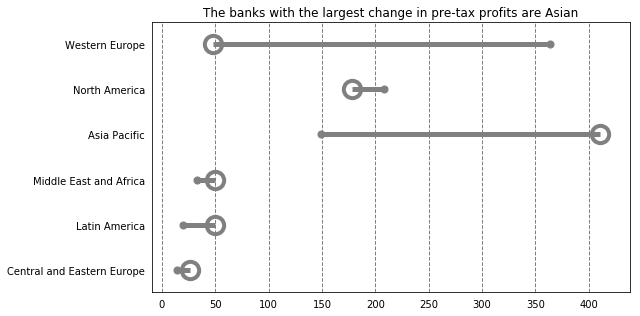

In [348]:
# Will re order the arrow chart by ascending order of pre-tax profits in 2007

# Sort dataframe
sorted_pre_tax = pre_tax.sort_values("perc-2007", ascending=True).reset_index(drop=True)
# Graph in new order
fig, ax = plt.subplots(figsize=(9,4.5))
ax.hlines(xmin=sorted_pre_tax['year-2007'], xmax=sorted_pre_tax['year-2011'], y=pre_tax.index, color="grey", linewidth=5  )
ax.scatter(x=sorted_pre_tax["year-2007"], y=pre_tax.index, edgecolor="grey", color="grey", linewidth='1', s=50)
ax.scatter(x=sorted_pre_tax["year-2011"], y=pre_tax.index, s=300, edgecolor="grey", color="white", linewidth='4')
ax.set_yticks(sorted_pre_tax.index)
ax.yaxis.set_ticklabels(sorted_pre_tax['region'])
# Set vertical grid
ax.grid(axis='x', which='major', linestyle='--', linewidth='1', color='grey')
# Set title
ax.set_title("The banks with the largest change in pre-tax profits are Asian")
# Strip ticks
plt.tick_params(axis='y', which='both',left='off', right='off')
plt.tick_params(axis='x', which='both',top='off', bottom='off')
# Save
plt.tight_layout()
plt.savefig("economistarrows.pdf", transparent=True)